In [150]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib
import matplotlib.pyplot as plt
from nltk.util import ngrams # function for making ngrams
import re
from numpy import sort
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
%matplotlib inline

In [153]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.optimizers

</p>
0 - русский
1 - белорусский
2 - украинский
3 - болгарский
4 - македонский
5 - сербский
<p>

In [4]:
languages_dict = {'ru' : 0, 'be' : 1, 'uk' : 2, 'bg' : 3, 'mk' : 4, 'sr' : 5}
text_sample_size = 20
num_lang_samples = 25000

def id2lang(id):
    for i, key in languages_dict.items():
        if key == id:
            return i
def size_mb(size):
    size_mb =  '{:.2f}'.format(size/(1000*1000.0))
    return size_mb + " MB"

In [5]:
def define_alphabet():
    slav = 'абвгдежзклмнопрстуфхцчш'
    rus  = 'ёийщъыьэюя'
    bel  = 'ёійўыьэюя'
    uk   = 'ґєиіїйщьюя'
    bul  = 'ийщъьюя'
    mac  = 'ѓѕијљњќџ'
    srp  = 'ђијљњћџ'
    
    all_lang_chars = slav + rus + bel + uk + bul + mac + srp
    small_chars = list(set(list(all_lang_chars)))
    small_chars.sort() 
    big_chars = list(set(list(all_lang_chars.upper())))
    big_chars.sort()
    letters_string = ''
    letters = small_chars + big_chars
    for letter in letters:
        letters_string += letter
    return small_chars,big_chars,letters_string

In [6]:
alphabet = define_alphabet()
print(alphabet)

(['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'ђ', 'ѓ', 'є', 'ѕ', 'і', 'ї', 'ј', 'љ', 'њ', 'ћ', 'ќ', 'ў', 'џ', 'ґ'], ['Ё', 'Ђ', 'Ѓ', 'Є', 'Ѕ', 'І', 'Ї', 'Ј', 'Љ', 'Њ', 'Ћ', 'Ќ', 'Ў', 'Џ', 'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я', 'Ґ'], 'абвгдежзийклмнопрстуфхцчшщъыьэюяёђѓєѕіїјљњћќўџґЁЂЃЄЅІЇЈЉЊЋЌЎЏАБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯҐ')


In [7]:
def get_sample_text(file_content,start_index,sample_size):
    end_index = start_index+sample_size
    return file_content[start_index:end_index]

def count_chars(text,alphabet):
    alphabet_counts = []
    for letter in alphabet:
        count = text.count(letter)
        alphabet_counts.append(count)
    return alphabet_counts

def get_input_row(content,start_index,sample_size):
    sample_text = get_sample_text(content,start_index,sample_size)
    for i in sample_text.split():
        sample_text += " " + i[-3:] + " " + i[-2:] + " " + i[-1:] 
    counted_chars_all = count_chars(sample_text.lower(),alphabet[0])
    counted_chars_big = count_chars(sample_text,alphabet[1])
    all_parts = counted_chars_all + counted_chars_big
    return all_parts

def get_for_pred_row(content):
    counted_chars_all = count_chars(sample_text.lower(),alphabet[0])
    counted_chars_big = count_chars(sample_text,alphabet[1])
    all_parts = counted_chars_all + counted_chars_big
    return all_parts

In [47]:
def create_dataset():
    for lang_code in languages_dict:
        X = pd.DataFrame(columns=['language', 'text'])
        path = os.path.join("./wikipedia-crawler/",  lang_code+"_clean.txt")
        with open(path, 'r', encoding = "utf-8") as f:
            for line in f:
                n = random.randrange(3, 6)
                a = list(ngrams(line.split(), n))
                lst = a[random.randrange(0, len(a))]
                if all(word.isalpha() for word in lst):
                    X = X.append({'language' : languages_dict[lang_code], 'text' : ' '.join(lst)}, ignore_index=True)
        X.to_csv(lang_code + '.csv', encoding='utf-8', index=False)

In [48]:
ru = pd.read_csv('./data/ru.csv')
be = pd.read_csv('./data/be.csv')
uk = pd.read_csv('./data/uk.csv')
bg = pd.read_csv('./data/bg.csv')
mk = pd.read_csv('./data/mk.csv')
sr = pd.read_csv('./data/sr.csv')

In [268]:
df = ru.head(6000)
df = df.append(be.head(6000))
df = df.append(uk.head(6000))
df = df.append(bg.head(6000))
df = df.append(mk.head(6000))
df = df.append(sr.head(6000))

In [65]:
df_test = pd.read_csv('./data/task2-dev.csv')

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb

In [ ]:
Y_train = df['language']
Y_test  = df_test['language']

In [134]:
n = df.shape[0]
vec = TfidfVectorizer(ngram_range=(1,3), analyzer='char',
                      use_idf=1, smooth_idf=1, sublinear_tf=1)
X_train = vec.fit_transform(df['text'])
X_test  = vec.transform(df_test['text']) 

In [232]:
# select features using threshold
thresholds = sort(clf.feature_importances_)
thresh = thresholds[15160]
clf = xgb.XGBClassifier()

selection = SelectFromModel(clf, threshold=thresh, prefit=True)

select_X_train = selection.transform(X_train)
selection_model = xgb.XGBClassifier()
selection_model.fit(select_X_train, Y_train)
select_X_test = selection.transform(X_test)

y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Y_test, y_pred)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=426, Accuracy: 90.33%


C:\Users\narek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [265]:
best_parameters = {
    #'learning_rate': 0.09,
    'max_depth': 9
}
selection_model = xgb.XGBClassifier(**best_parameters)
selection_model.fit(select_X_train, Y_train)
y_pred = selection_model.predict(select_X_test)
print(accuracy_score(Y_test, y_pred))

0.9366666666666666


C:\Users\narek\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [267]:
ans = 0
for i in range(len(Y_test)):
    if Y_test[i] == y_pred[i]:
        ans += 1
    else:
        print(df_test.values[i], y_pred[i])

[0 'Эта победа стала первой для'] 1
[0 'Кайл, Картман и Баттерс крадут'] 3
[0 'Несмотря на успехи'] 3
[0 'На вопрос Натана'] 4
[0 'Натан замечает, что «Рой» избегает'] 3
[0 'Маликов заявляет, что кто-то активировал'] 3
[0 'Натан бежит за Дедалом'] 3
[0 'Дно чаши кратера заполнено через'] 4
[1 'З-за таго, што імя Басараба'] 2
[1 'Атлас охотника и рыболова Витебская'] 0
[1 'Вася Атанасова Уикипедия е своеобразно'] 3
[1 '«На втората си годишнина Българската'] 3
[1 'На той момант ён ужо'] 0
[2 '«Festival della Canzone Napoletana» '] 1
[3 'Консул Гай Семпроний Тудицан навлиза'] 0
[3 'Той успешно действа срещу племената'] 0
[3 'Баща му иконом Стамат Пачаджиев'] 0
[3 'По времето на Шестата офанзива'] 4
[4 'Населените места Кивиоли'] 3
[4 'Селото има поледелко-шумарска функција Северно'] 5
[4 'Драган Цанков и Никола Сапунов'] 0
[4 'Амбасадорот Лобанов-Ростoвски им наредил на'] 0
[4 'Бурназовски Тодоров Киро-Бурназ е роден'] 0
[4 'По се изгледа тие не'] 3
[4 'Денес Отава е значаен културен'] 3


array([0, 'Олег Шилов самостоятельно сделал мачту'], dtype=object)

In [69]:
lang_seq = 0
jump_reduce = 0.2
X_test = []
Y_test = []
for lang_code in languages_dict:
    start_index = 0
    path = os.path.join("./wikipedia-crawler/", lang_code+"_clean.txt")
    with open(path, 'r', encoding = "UTF-8") as f:
        print ("Processing file : " + path)
        file_content = f.read()
        content_length = len(file_content)
        remaining = content_length - text_sample_size*num_lang_samples
        jump = int(((remaining/num_lang_samples)*3)/4)
        print ("File size : ",size_mb(content_length),\
               " | # possible samples : ",int(content_length/input_size),\
               " | # skip chars : " + str(jump))
        for idx in range(num_lang_samples):
            input_row = get_input_row(file_content,start_index ,text_sample_size)
            X_test.append(input_row)
            Y_test.append(languages_dict[lang_code])
            start_index += text_sample_size + jump
    lang_seq += 1
    print (100*"-")

Processing file : ./wikipedia-crawler/ru_clean.txt
File size :  17.54 MB  | # possible samples :  186628  | # skip chars : 511
----------------------------------------------------------------------------------------------------
Processing file : ./wikipedia-crawler/be_clean.txt
File size :  3.91 MB  | # possible samples :  41608  | # skip chars : 102
----------------------------------------------------------------------------------------------------
Processing file : ./wikipedia-crawler/uk_clean.txt
File size :  6.89 MB  | # possible samples :  73253  | # skip chars : 191
----------------------------------------------------------------------------------------------------
Processing file : ./wikipedia-crawler/bg_clean.txt
File size :  5.56 MB  | # possible samples :  59175  | # skip chars : 151
----------------------------------------------------------------------------------------------------
Processing file : ./wikipedia-crawler/mk_clean.txt
File size :  5.05 MB  | # possible samples 

In [94]:
type(X_test)

list

In [95]:
from keras.utils import np_utils

X = np.asanyarray(X_test, dtype=np.float64)
Y = np.asanyarray(Y_test, dtype=np.float64)


random_index = random.randrange(0,X.shape[0])
print("Example data before processing:")
print("X : \n", X[random_index,])
print("Y : \n", Y[random_index])
Y = np_utils.to_categorical(Y, len(languages_dict))
#time.sleep(120) # sleep time to allow release memory. This step is very memory consuming
# X preprocessing
# standar scaler will be useful laterm during DNN prediction
standard_scaler = preprocessing.StandardScaler().fit(X)
X = standard_scaler.transform(X)   
print ("X preprocessed shape :", X.shape)
# Y one-hot encoding

# See the sample data
print("Example data after processing:")
print("X : \n", X[random_index,])
print("Y : \n", Y[random_index])
# train/test split. Static seed to have comparable results for different runs
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)
del X, Y
# wait for memory release again
#time.sleep(120)
# save train/test arrays to file 
path_tt = os.path.join("./"+"train_test_data_"+str(input_size)+".npz")
np.savez_compressed(path_tt,X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test)
print(path_tt, "size : ",size_mb(os.path.getsize(path_tt)))
del X_train,Y_train,X_test,Y_test

Example data before processing:
X : 
 [14.  3.  0.  0.  1.  0.  0.  1.  0.  0.  4.  3.  0.  1.  2.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]
Y : 
 1.0
X preprocessed shape : (150000, 94)
Example data after processing:
X : 
 [ 2.71464546e+00  3.18446542e+00 -7.54155910e-01 -4.77963209e-01
 -2.61716108e-03 -9.11071768e-01 -2.72007100e-01  3.73048056e-01
 -8.89422652e-01 -2.99685080e-01  1.68905185e+00  1.24270127e+00
 -5.50329888e-01 -5.88990428e-01 -3.24726069e-01  3.39272592e-01
 -2.43833359e-01 -2.49315012e-01 -8.63319068e-01 -5.35092097e-01
 -1.93202332e-01 -3.00311717e-01 -3.51280798e-01 -3.66781212e-01
 -2.82773103e-01 -1.47222662e-01 -1.58575429e-01 -3.35588227e-01
 -2.96668244e-01 -1.54695589e-01 -2.03361

In [96]:
# load train data first from file
path_tt = os.path.join("./","train_test_data_"+str(input_size)+".npz")
train_test_data = np.load(path_tt)
X_train = train_test_data['X_train']
print ("X_train: ",X_train.shape)
Y_train = train_test_data['Y_train']
print ("Y_train: ",Y_train.shape)
X_test = train_test_data['X_test']
print ("X_test: ",X_test.shape)
Y_test = train_test_data['Y_test']
print ("Y_test: ",Y_test.shape)
del train_test_data

X_train:  (120000, 94)
Y_train:  (120000, 6)
X_test:  (30000, 94)
Y_test:  (30000, 6)


In [97]:
# create DNN using Keras Sequential API
# I added Dropout to prevent overfitting
print(input_size)
model = Sequential()
model.add(Dense(500,input_dim=input_size,init="glorot_uniform",activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(300,init="glorot_uniform",activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(100,init="glorot_uniform",activation="sigmoid"))
model.add(Dropout(0.5))
model.add(Dense(len(languages_dict),init="glorot_uniform",activation="softmax"))
model_optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=model_optimizer,
              metrics=['accuracy'])

94


C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, input_dim=94, activation="sigmoid", kernel_initializer="glorot_uniform")`
  """
C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="sigmoid", kernel_initializer="glorot_uniform")`
  import sys
C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="sigmoid", kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':
C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="softmax", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               47500     
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 606       
Total para

In [99]:
# let's fit the data
# history variable will help us to plot results later
history = model.fit(X_train,Y_train,
          nb_epoch=12,
          validation_split=0.10,
          batch_size=32,
          verbose=2,
          shuffle=True)

C:\Users\narek\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 108000 samples, validate on 12000 samples
Epoch 1/12
 - 14s - loss: 0.9280 - acc: 0.6174 - val_loss: 0.6838 - val_acc: 0.7113
Epoch 2/12
 - 14s - loss: 0.7412 - acc: 0.6915 - val_loss: 0.6460 - val_acc: 0.7291
Epoch 3/12
 - 14s - loss: 0.7078 - acc: 0.7030 - val_loss: 0.6311 - val_acc: 0.7275
Epoch 4/12
 - 14s - loss: 0.6896 - acc: 0.7106 - val_loss: 0.6150 - val_acc: 0.7402
Epoch 5/12
 - 14s - loss: 0.6766 - acc: 0.7147 - val_loss: 0.6125 - val_acc: 0.7353
Epoch 6/12
 - 14s - loss: 0.6624 - acc: 0.7203 - val_loss: 0.6018 - val_acc: 0.7422
Epoch 7/12
 - 14s - loss: 0.6553 - acc: 0.7230 - val_loss: 0.5965 - val_acc: 0.7436
Epoch 8/12
 - 14s - loss: 0.6465 - acc: 0.7273 - val_loss: 0.5905 - val_acc: 0.7448
Epoch 9/12
 - 14s - loss: 0.6410 - acc: 0.7303 - val_loss: 0.5853 - val_acc: 0.7465
Epoch 10/12
 - 14s - loss: 0.6367 - acc: 0.7325 - val_loss: 0.5864 - val_acc: 0.7419
Epoch 11/12
 - 14s - loss: 0.6330 - acc: 0.7362 - val_loss: 0.5809 - val_acc: 0.7459
Epoch 12/12
 - 14s - lo

In [100]:
# now we will face the TRUTH. What is our model real accuracy tested on unseen data?
scores = model.evaluate(X_test, Y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

30000/30000 [==============================] - 1s 38us/step
acc: 75.20%


In [101]:
# and now we will prepare data for scikit-learn classification report
Y_pred = model.predict_classes(X_test)
Y_pred = np_utils.to_categorical(Y_pred, len(languages_dict))

In [102]:
# and run the report
target_names =  list(languages_dict.keys())
print(classification_report(Y_test, Y_pred, target_names=target_names))

             precision    recall  f1-score   support

         ru       0.72      0.74      0.73      4915
         be       0.94      0.90      0.92      5015
         uk       0.93      0.77      0.84      5031
         bg       0.68      0.69      0.68      5052
         mk       0.60      0.67      0.63      5036
         sr       0.71      0.74      0.73      4951

avg / total       0.76      0.75      0.76     30000



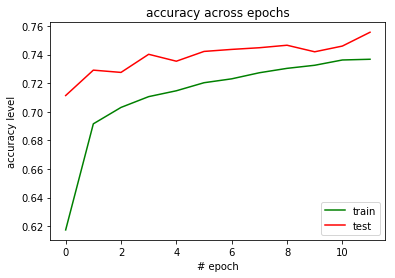

In [103]:
# show plot accuracy changes during training
plt.plot(history.history['acc'],'g')
plt.plot(history.history['val_acc'],'r')
plt.title('accuracy across epochs')
plt.ylabel('accuracy level')
plt.xlabel('# epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

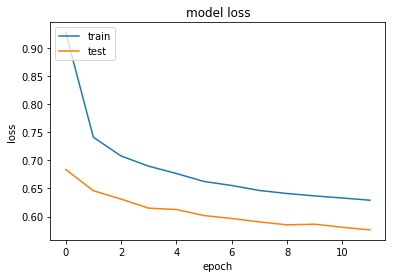

In [104]:
# show plot of loss changes during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
X_val = pd.read_csv('./task2-dev.csv')

In [106]:
X = []
y = []
for i in X_val.values:
    input_row = get_for_pred_row(i[1])
    X.append(input_row)
    y.append(i[0])

In [107]:
test_array = standard_scaler.transform(X) 

In [108]:
Y_pred = model.predict_classes(test_array)

In [109]:
test_array

array([[-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ],
       [-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ],
       [-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ],
       ...,
       [-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ],
       [-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ],
       [-0.93562144, -0.41391805, -0.75415591, ..., -0.04035658,
        -0.04738937, -0.0088565 ]])

In [110]:
ans = 0
for i in range(len(y)):
    if y[i] == Y_pred[i]:
        ans += 1
    else:
        print(X_val.values[i], Y_pred[i])
print(ans / len(y))

[1 'Паўднёвыя алтайцы — асабіста алтайцы'] 0
[1 'У савецкі час пачалі выдавацца'] 0
[1 'У першую чаргу'] 0
[1 'Уваходзіў у склад Адукацыйнай камісіі'] 0
[1 'Быў паслядоўным прыхільнікам пераходу да'] 0
[1 'У зборы прадстаўлены цыкл фрэсак'] 0
[1 'Выхоўваўся пры двары англійскага караля'] 0
[1 'Акрамя таго, спрэчная вобласць мела'] 0
[1 'Таварыства атрымала для навуковых даследаванняў'] 0
[1 'У XIX стагоддзі Пруская акадэмія'] 0
[1 'У супрацьлегласць Кіеву'] 0
[1 'На прамавугольнай частцы плошчы быў'] 0
[1 'Па заканчэнні сезону «Баварыя» абвясціла'] 0
[1 'Вучыўся ў езуіцкай семінарыі ў'] 0
[1 'Гуманістычнае і талерантнае стаўленне да'] 0
[1 'Як правіла, афарбоўка верхняй часткі'] 0
[1 'месцаў, адкрытыя трыбуны з услонамі'] 0
[1 'Адчыняў стадыён вайсковы аркестр і'] 0
[1 'Марфалогія Ыфкуіл сінтэтычная аглютынатыўная мова'] 0
[1 'Выхаванец ДЮСШ запарожскага «Металурга»'] 0
[1 'Футбаліст правёў на полі ўсе'] 0
[1 'Найбольш вядомыя роспісы — у'] 0
[1 'Са станковых палотнаў характэрны «Партр

In [33]:
X_val.values[0]

array([0, 'Олег Шилов самостоятельно сделал мачту'], dtype=object)